In [76]:
#dependencies and importing csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

path = "IMDB-Movie-Data.csv"

movie_data = pd.read_csv(path)
movie_data = movie_data.dropna()
movie_data.count()

Rank                  838
Title                 838
Genre                 838
Description           838
Director              838
Actors                838
Year                  838
Runtime (Minutes)     838
Rating                838
Votes                 838
Revenue (Millions)    838
Metascore             838
dtype: int64

In [121]:
#Summary statistics Table

avg_revenue = movie_data["Revenue (Millions)"].mean()
med_revenue = movie_data["Revenue (Millions)"].median()
var_revenue = movie_data["Revenue (Millions)"].var(ddof=0)
std_revenue = movie_data["Revenue (Millions)"].std(ddof=0)
sem_revenue = movie_data["Revenue (Millions)"].sem()



summary_stats_revenue = pd.DataFrame({"Average Revenue (Millions)": avg_revenue,
                                   "Median Revenue (Millions)" :med_revenue,
                                   "Revenue (Millions) Variance":var_revenue,
                                   "Revenue (Millions) Standard Deviation":std_revenue,
                                   "SEM Revenue (Millions)": sem_revenue},index=[0])
summary_stats_revenue

,Average Revenue (Millions),Median Revenue (Millions),Revenue (Millions) Variance,Revenue (Millions) Standard Deviation,SEM Revenue (Millions)
0,84.564558,48.15,10911.441385,104.457845,3.610591


C:\Users\littleja\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


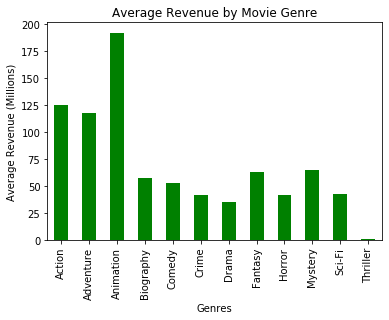

<Figure size 432x288 with 0 Axes>

In [98]:
#revenue earnings based off genre

for index, row in movie_data.iterrows():
   movie_data['Genre'][index] = movie_data['Genre'][index].split(',')[0]

movie_data.head()

genre_grouped = movie_data.groupby("Genre")

revenue = genre_grouped["Revenue (Millions)"].mean()


revenue.plot(kind='bar', color = 'g')
plt.title("Average Revenue by Movie Genre")
plt.ylabel("Average Revenue (Millions)")
plt.xlabel("Genres")

plt.show()
plt.tight_layout()
              



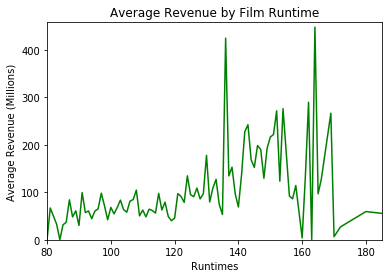

<Figure size 432x288 with 0 Axes>

In [80]:
#line graph - revenue earnings compared to runtime

#line average earnings for run times
runtime_grouped = movie_data.groupby("Runtime (Minutes)")
avg_rev = runtime_grouped["Revenue (Millions)"].mean()




line_plot = avg_rev.plot(kind="line", color = 'g')
line_plot.set_title("Average Revenue by Film Runtime")
line_plot.set_ylabel("Average Revenue (Millions)")
line_plot.set_xlabel("Runtimes")

plt.xlim(80,185)
plt.ylim(0,max(avg_rev)+10)

plt.show()
plt.tight_layout()



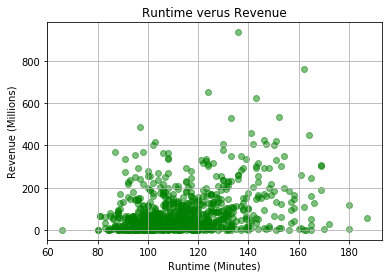

<Figure size 432x288 with 0 Axes>

In [102]:
#Scatter plot - runtimes by revenue
runtime = movie_data.loc[:,"Runtime (Minutes)"]
revenue = movie_data.loc[:,"Revenue (Millions)"]


plt.scatter(runtime,revenue, marker= 'o', alpha = .5, color = 'g')


plt.xlabel('Runtime (Minutes)')
plt.ylabel('Revenue (Millions)')
plt.title("Runtime verus Revenue")

plt.grid()
plt.show()
plt.tight_layout()

The correlation between both factors is 0.28
The r-squared is: 0.28172073231133676


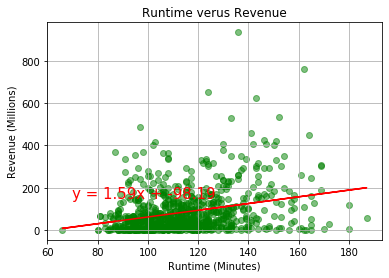

<Figure size 432x288 with 0 Axes>

In [109]:
#Scatter plus linear regression line
x_values = runtime
y_values = revenue
correlation = st.pearsonr(runtime,revenue)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',alpha=.5,color='g')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,150),fontsize=15,color="red")
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Revenue (Millions)')
plt.title("Runtime verus Revenue")

print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue}")
plt.grid()
plt.show()
plt.tight_layout()